## Amount of reviews

Predict the amount of reviews 

In [31]:
import pandas as pd
import numpy as np
# from fastai.imports import *
pd.set_option('display.max_columns', None)
df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

Clean the data

In [32]:
df["rank"]=df["rank"].str.replace("#","").astype(float)
df["general rating"]=df["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df["number of reviews"]=df["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

df['city'] = df["address"].str.split(', ').str[-1].str.split(" ").str[0]

upper_bound = df["price range"].str.split(" - ").str[1]
upper_bound = upper_bound.str.split('€').str[1]
upper_bound = pd.to_numeric(upper_bound)

lower_bound = df["price range"].str.split(" - ").str[0]
lower_bound = lower_bound.str.split('€').str[1]
lower_bound = pd.to_numeric(lower_bound)
df['upper price'] = upper_bound
df['lower price'] = lower_bound


We drop the features that will have for sure no influence on the result such as phone number

In [33]:
df.drop(columns=["address", "cuisines", "special diets", "phone number", "price range", "email address", "website url", "menu url", "timetable", "description", "dutch description", "id", "restaurant name"],inplace=True)

In [34]:
df.head(2)

,rank,general rating,number of reviews,tags,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,meals,restaurant features,city,upper price,lower price
0,1.0,5.0,922.0,$$ - $$$|Thai|Healthy|Vegetarian Friendly,True,False,5.0,5.0,4.5,-1.0,"Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",Ghent,28.0,10.0
1,1.0,5.0,200.0,$$$$|French|Belgian|European,False,True,5.0,5.0,4.5,5.0,"Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",Ninove,74.0,32.0


One hot encoding

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
city_encoded=enc.fit_transform(df[['city']])
enc.categories_
ohe_df = pd.DataFrame(city_encoded, columns=enc.categories_)
ohe_df
# #concat with original data
df = pd.concat([df, ohe_df], axis=1).drop(['city'], axis=1)
df.head(2)

,rank,general rating,number of reviews,tags,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,meals,restaurant features,upper price,lower price,"(Aaigem,)","(Aalst,)","(Aalter,)","(Adegem,)","(Afsnee,)","(Asper,)","(Assenede,)","(Astene,)","(Baarle,)","(Bachte-Maria-Leerne,)","(Balegem,)","(Bazel,)","(Bellem,)","(Belsele,)","(Berchem,)","(Berlare,)","(Bevere,)","(Beveren,)","(Boekhoute,)","(Bottelare,)","(Brakel,)","(Buggenhout,)","(De,)","(Deinze,)","(Denderhoutem,)","(Denderleeuw,)","(Dendermonde,)","(Denderwindeke,)","(Destelbergen,)","(Deurle,)","(Dikkelvenne,)","(Dries,)","(Drongen,)","(Edelare,)","(Eeklo,)","(Eke,)","(Elene,)","(Elsegem,)","(Erembodegem,)","(Erondegem,)","(Erpe,)","(Erpe-Mere,)","(Ertvelde,)","(Evergem,)","(Gavere,)","(Geraardsbergen,)","(Ghent,)","(Gijzegem,)","(Grammene,)","(Grotenberge,)","(Haaltert,)","(Haasdonk,)","(Hamme,)","(Herzele,)","(Heurne,)","(Heusden,)","(Hofstade,)","(Hoorebeke,)","(Horebeke,)","(Huise,)","(Kalken,)","(Kallo,)","(Kaprijke,)","(Kastel,)","(Kemzeke,)","(Kieldrecht,)","(Kluisbergen-Ruien,)","(Knesselare,)","(Kruibeke,)","(Kruisem,)","(Kruishoutem,)","(Kwaremont,)","(Laarne,)","(Lebbeke,)","(Lede,)","(Ledeberg,)","(Lembeke,)","(Lierde,)","(Lievegem,)","(Lochristi,)","(Lokeren,)","(Lotenhulle,)","(Lovendegem,)","(Lozer,)","(Maarkedal,)","(Maldegem,)","(Massemen,)","(Mater,)","(Melden,)","(Melle,)","(Melsele,)","(Mendonk,)","(Merelbeke,)","(Merendree,)","(Middelburg,)","(Moerbeke,)","(Moerzeke,)","(Moorsel,)","(Munte,)","(Nazareth,)","(Nederename,)","(Nevele,)","(Nieuwege,)","(Nieuwenhove,)","(Nieuwkerken-Waas,)","(Ninove,)","(Nokere,)","(Nukerke,)","(Oordegem,)","(Oosterzele,)","(Opdorp,)","(Ophasselt,)","(Oudenaarde,)","(Outer,)","(Parike,)","(Ronse,)","(Rupelmonde,)","(Schelderode,)","(Scheldewindeke,)","(Schellebelle,)","(Schendelbeke,)","(Schorisse,)","(Semmerzake,)","(Serskamp,)","(Sinaai,)","(Sint-Denijs-Westrem,)","(Sint-Gillis-Waas,)","(Sint-Gillis-bij-Dendermonde,)","(Sint-Jan-in-Eremo,)","(Sint-Laureins,)","(Sint-Lievens-Houtem,)","(Sint-Maria-Oudenhove,)","(Sint-Martens-Latem,)","(Sint-Martens-Leerne,)","(Sint-Niklaas,)","(Sint-Pauwels,)","(Steenberge,)","(Steendorp,)","(Steenhuize,)","(Stekene,)","(Temse,)","(Teralfene,)","(Tielrode,)","(Ursel,)","(Velzeke-Ruddershove,)","(Viane,)","(Vinkt,)","(Vrasene,)","(Vurste,)","(Waarschoot,)","(Waasmunster,)","(Wachtebeke,)","(Wannegem-Lede,)","(Watervliet,)","(Welle,)","(Wetteren,)","(Wichelen,)","(Wondelgem,)","(Wontergem,)","(Wortegem-Petegem,)","(Zele,)","(Zelzate,)","(Zevergem,)","(Zingem,)","(Zomergem,)","(Zottegem,)","(Zulte,)","(Zwalm,)","(Zwijnaarde,)"
0,1.0,5.0,922.0,$$ - $$$|Thai|Healthy|Vegetarian Friendly,True,False,5.0,5.0,4.5,-1.0,"Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",28.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,5.0,200.0,$$$$|French|Belgian|European,False,True,5.0,5.0,4.5,5.0,"Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",74.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

even droppen zodat wwe geen multi hot moeten doen

In [36]:
df.drop(columns=["restaurant features", "meals", "tags"],inplace=True)


We replace all NaN values with the median

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)
X = imputer.transform(df)
df = pd.DataFrame(X, columns=df.columns, index=df.index)
df

,rank,general rating,number of reviews,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,upper price,lower price,"(Aaigem,)","(Aalst,)","(Aalter,)","(Adegem,)","(Afsnee,)","(Asper,)","(Assenede,)","(Astene,)","(Baarle,)","(Bachte-Maria-Leerne,)","(Balegem,)","(Bazel,)","(Bellem,)","(Belsele,)","(Berchem,)","(Berlare,)","(Bevere,)","(Beveren,)","(Boekhoute,)","(Bottelare,)","(Brakel,)","(Buggenhout,)","(De,)","(Deinze,)","(Denderhoutem,)","(Denderleeuw,)","(Dendermonde,)","(Denderwindeke,)","(Destelbergen,)","(Deurle,)","(Dikkelvenne,)","(Dries,)","(Drongen,)","(Edelare,)","(Eeklo,)","(Eke,)","(Elene,)","(Elsegem,)","(Erembodegem,)","(Erondegem,)","(Erpe,)","(Erpe-Mere,)","(Ertvelde,)","(Evergem,)","(Gavere,)","(Geraardsbergen,)","(Ghent,)","(Gijzegem,)","(Grammene,)","(Grotenberge,)","(Haaltert,)","(Haasdonk,)","(Hamme,)","(Herzele,)","(Heurne,)","(Heusden,)","(Hofstade,)","(Hoorebeke,)","(Horebeke,)","(Huise,)","(Kalken,)","(Kallo,)","(Kaprijke,)","(Kastel,)","(Kemzeke,)","(Kieldrecht,)","(Kluisbergen-Ruien,)","(Knesselare,)","(Kruibeke,)","(Kruisem,)","(Kruishoutem,)","(Kwaremont,)","(Laarne,)","(Lebbeke,)","(Lede,)","(Ledeberg,)","(Lembeke,)","(Lierde,)","(Lievegem,)","(Lochristi,)","(Lokeren,)","(Lotenhulle,)","(Lovendegem,)","(Lozer,)","(Maarkedal,)","(Maldegem,)","(Massemen,)","(Mater,)","(Melden,)","(Melle,)","(Melsele,)","(Mendonk,)","(Merelbeke,)","(Merendree,)","(Middelburg,)","(Moerbeke,)","(Moerzeke,)","(Moorsel,)","(Munte,)","(Nazareth,)","(Nederename,)","(Nevele,)","(Nieuwege,)","(Nieuwenhove,)","(Nieuwkerken-Waas,)","(Ninove,)","(Nokere,)","(Nukerke,)","(Oordegem,)","(Oosterzele,)","(Opdorp,)","(Ophasselt,)","(Oudenaarde,)","(Outer,)","(Parike,)","(Ronse,)","(Rupelmonde,)","(Schelderode,)","(Scheldewindeke,)","(Schellebelle,)","(Schendelbeke,)","(Schorisse,)","(Semmerzake,)","(Serskamp,)","(Sinaai,)","(Sint-Denijs-Westrem,)","(Sint-Gillis-Waas,)","(Sint-Gillis-bij-Dendermonde,)","(Sint-Jan-in-Eremo,)","(Sint-Laureins,)","(Sint-Lievens-Houtem,)","(Sint-Maria-Oudenhove,)","(Sint-Martens-Latem,)","(Sint-Martens-Leerne,)","(Sint-Niklaas,)","(Sint-Pauwels,)","(Steenberge,)","(Steendorp,)","(Steenhuize,)","(Stekene,)","(Temse,)","(Teralfene,)","(Tielrode,)","(Ursel,)","(Velzeke-Ruddershove,)","(Viane,)","(Vinkt,)","(Vrasene,)","(Vurste,)","(Waarschoot,)","(Waasmunster,)","(Wachtebeke,)","(Wannegem-Lede,)","(Watervliet,)","(Welle,)","(Wetteren,)","(Wichelen,)","(Wondelgem,)","(Wontergem,)","(Wortegem-Petegem,)","(Zele,)","(Zelzate,)","(Zevergem,)","(Zingem,)","(Zomergem,)","(Zottegem,)","(Zulte,)","(Zwalm,)","(Zwijnaarde,)"
0,1.0,5.0,922.0,1.0,0.0,5.0,5.0,4.5,-1.0,28.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,5.0,200.0,0.0,1.0,5.0,5.0,4.5,5.0,74.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [38]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2,train_size=0.8,shuffle=True)
# print(df)

x_train, x_test, y_train, y_test = train.loc[:, df.columns != 'number of reviews'], test.loc[:, df.columns != 'number of reviews'] \
    ,train["number of reviews"], test["number of reviews"]

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

std_scaler = StandardScaler()
lin_reg = LinearRegression()


my_pipeline = Pipeline([
    # ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),

])
my_pipeline.fit(x_train, y_train)


Pipeline(steps=[('lin_reg', LinearRegression())])

In the pipeline we tried to use tricks to improve our model but that failed

In [40]:
# std_scaler = StandardScaler()
polybig_features = PolynomialFeatures(degree=2, include_bias=False)

In [41]:
predictions = my_pipeline.predict(x_test)
predictions[predictions<0] = 0

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

62.928870160995224

In [42]:
print(y_test)
len(predictions)

2329     8.0
363     73.0
161     83.0
1313    14.0
2273    13.0
        ... 
924     29.0
562     23.0
1896    16.0
2305    10.0
1833     2.0
Name: number of reviews, Length: 517, dtype: float64


517

Plotting learning curve

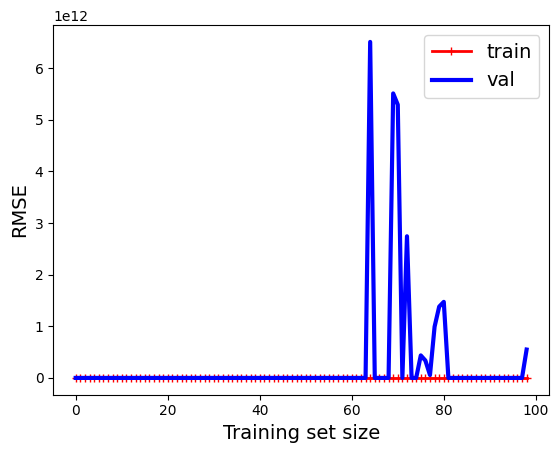

In [43]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

def plot_learning_curves(model, X_train, X_val, y_train, y_val):
# run block of code and catch warnings

    train_errors, val_errors = [], []
    # for m in range(1, len(X_train) + 1):
    for m in range(1, 100):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown


plot_learning_curves(my_pipeline, x_train, x_test, y_train, y_test)
# plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()